## Taxifare prediction using RandomForest Model

In [2]:
!pip install haversine

In [3]:
## Importing the required libraries
import pandas as pd
import numpy as np
import haversine as hs
import os 

In [4]:
os.getcwd()

'C:\\Users\\VIKESH\\Desktop\\DATA_SET\\taxi'

In [5]:
## Loading the data
df = pd.read_csv(r"C:\Users\VIKESH\Desktop\DATA_SET\taxi\167541777937860ec2379f8793842aa5b168a_.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:
## Dropping the rows with latitude more than 180
df = df[df.latitude_of_pickup <= 180]


In [9]:
df.shape

(49999, 8)

In [10]:
def distance_calculator(plong, plat, dlong, dlat):
    dist = round(hs.haversine((plong, plat), (dlong, dlat)),2)
    return dist

In [11]:
df['distance'] = df.apply(lambda x: distance_calculator(x.longitude_of_pickup, x.latitude_of_pickup, \
                                                        x.longitude_of_dropoff,x.latitude_of_dropoff ), axis=1)

In [12]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [13]:
## Converting date_time_of_pickup to a date_time object so that we can parse the parts of the dates.
df['date_time_of_pickup'] = pd.to_datetime(df.date_time_of_pickup)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             49999 non-null  object             
 1   amount                49999 non-null  float64            
 2   date_time_of_pickup   49999 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   49999 non-null  float64            
 4   latitude_of_pickup    49999 non-null  float64            
 5   longitude_of_dropoff  49999 non-null  float64            
 6   latitude_of_dropoff   49999 non-null  float64            
 7   no_of_passenger       49999 non-null  int64              
 8   distance              49999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(1)
memory usage: 3.8+ MB


In [15]:
# extract various date time components as seperate variables
df = df.assign(hour = df.date_time_of_pickup.dt.hour, 
                         day = df.date_time_of_pickup.dt.day,
                        month = df.date_time_of_pickup.dt.month, 
                        year = df.date_time_of_pickup.dt.year, 
                        dayofweek = df.date_time_of_pickup.dt.dayofweek)

In [16]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance,hour,day,month,year,dayofweek
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.41,17,15,6,2009,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,4.63,16,5,1,2010,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.00,0,18,8,2011,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.91,4,21,4,2012,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.36,7,9,3,2010,1


In [17]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'distance', 'hour', 'day', 'month', 'year',
       'dayofweek'],
      dtype='object')

In [18]:
req_columns = ['amount','no_of_passenger', 'distance', 'hour', 'day', 'month', 'dayofweek']

In [19]:
df_new = df[req_columns]
df_new.shape

(49999, 7)

In [20]:
## Let us inspect the amount (target variable)
df_new.amount.describe()

count    49999.000000
mean        11.364333
std          9.685587
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

From the statistics, the amount can't be negative.  Let us check how many observations have negative value

In [21]:
df_new[df_new.amount <= 0].shape

(9, 7)

Only 9 rows have negative or zero amount.  Let us drop those rows.

In [22]:
df_new = df_new[df_new.amount >0]
print(df_new.shape)

(49990, 7)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
X = df_new.drop('amount',axis=1)
y = df_new['amount']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 1)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(39992, 6) (9998, 6) (39992,) (9998,)


In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_tr_pred = lr_model.predict(X_train)
lr_pred = lr_model.predict(X_test)

In [27]:
## Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

print('LR Model R2_score : ', r2_score(y_train, lr_tr_pred))
print('LR Model RMSE : ', np.sqrt(mean_squared_error(y_test, lr_pred)))

LR Model R2_score :  0.0016299461408586513
LR Model RMSE :  9.268514602023792


In [28]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_tr_pred = rf_model.predict(X_train)
rf_pred = rf_model.predict(X_test)

In [29]:
## Evaluating the model
print('RF Model R2_score : ', round(r2_score(y_test, rf_pred)*100,2),'%')
print('RF Model RMSE : ', round(np.sqrt(mean_squared_error(y_test, rf_pred)),2))

RF Model R2_score :  67.12 %
RF Model RMSE :  5.32


In [30]:
rf_model.feature_importances_

array([0.02030348, 0.73347181, 0.06999897, 0.07842731, 0.05551342,
       0.04228501])

In [31]:
df_fea_imp = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), columns=['cols','imp'])
df_fea_imp = df_fea_imp.sort_values('imp', ascending=False)

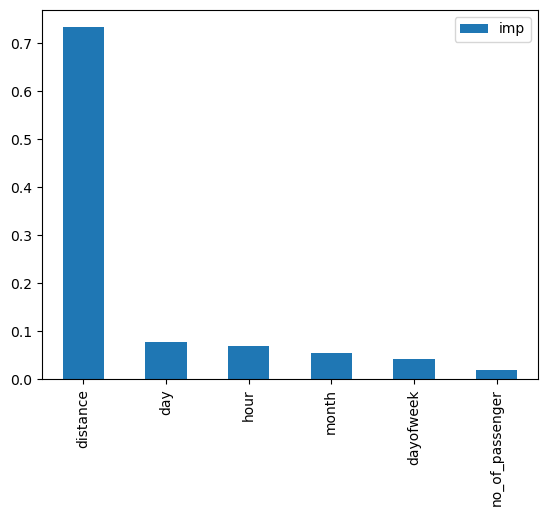

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


df_fea_imp.plot(kind='bar')
plt.xticks(ticks=np.arange(len(df_fea_imp)), labels=list(df_fea_imp.cols))
plt.show()

In [33]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [34]:
## Evaluating the model
print('RF Model R2_score : ', r2_score(y_test, dt_pred))
print('RF Model RMSE : ', np.sqrt(mean_squared_error(y_test, dt_pred)))

RF Model R2_score :  0.22944408491906731
RF Model RMSE :  8.145087997787275


In [35]:
df.amount.mean()

11.364332686653714

In [36]:
df_new.columns

Index(['amount', 'no_of_passenger', 'distance', 'hour', 'day', 'month',
       'dayofweek'],
      dtype='object')

In [37]:
hour_mean = df_new.groupby('hour')['amount'].mean().round(2)
hour_mean

hour
0     11.92
1     11.73
2     11.25
3     12.09
4     13.74
5     15.37
6     12.28
7     11.12
8     10.62
9     10.53
10    10.86
11    11.09
12    11.26
13    11.66
14    12.09
15    12.08
16    12.24
17    11.33
18    11.15
19    10.74
20    10.74
21    11.07
22    11.04
23    11.36
Name: amount, dtype: float64

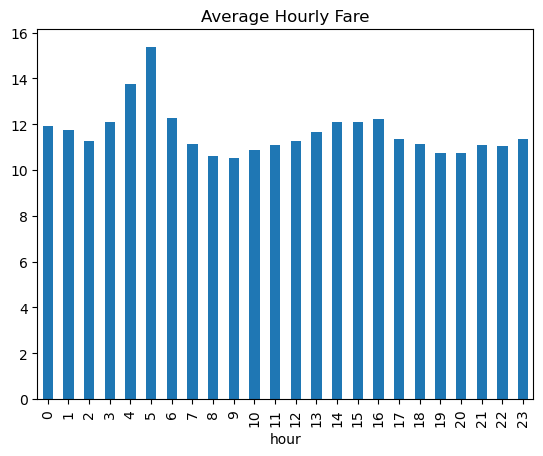

In [38]:
hour_mean.plot(kind='bar')
plt.title('Average Hourly Fare')
plt.show()

In [39]:
weekday_mean = df_new.groupby('dayofweek')['amount'].mean().round(2)
weekday_mean

dayofweek
0    11.57
1    11.17
2    11.10
3    11.67
4    11.41
5    11.14
6    11.52
Name: amount, dtype: float64

### Feature Engineering

In [40]:
## Comparing hourly fare of weekdays and weekends.
weekday_fare = df_new.loc[(df_new.dayofweek >= 0) & (df_new.dayofweek <= 4)].groupby('hour')['amount'].mean().round(2)
weekend_fare = df_new.loc[(df_new.dayofweek >= 5) & (df_new.dayofweek <= 6)].groupby('hour')['amount'].mean().round(2)

In [41]:
weekday_fare, weekend_fare

(hour
 0     12.08
 1     12.52
 2     10.93
 3     11.84
 4     14.96
 5     15.50
 6     11.44
 7     10.86
 8     10.47
 9     10.70
 10    11.20
 11    11.31
 12    11.48
 13    11.71
 14    12.22
 15    12.05
 16    12.53
 17    11.43
 18    11.01
 19    10.76
 20    10.79
 21    11.29
 22    11.06
 23    11.31
 Name: amount, dtype: float64,
 hour
 0     11.73
 1     10.99
 2     11.48
 3     12.25
 4     12.70
 5     15.06
 6     16.82
 7     13.08
 8     11.55
 9      9.81
 10     9.94
 11    10.55
 12    10.72
 13    11.55
 14    11.76
 15    12.13
 16    11.58
 17    11.09
 18    11.58
 19    10.68
 20    10.58
 21    10.37
 22    10.97
 23    11.49
 Name: amount, dtype: float64)

In [42]:
df_new.loc[(df_new.dayofweek >= 0) & (df_new.dayofweek <= 4)].head()

,amount,no_of_passenger,distance,hour,day,month,dayofweek
0,4.5,1,0.41,17,15,6,0
1,16.9,1,4.63,16,5,1,1
2,5.7,2,1.00,0,18,8,3
4,5.3,1,1.36,7,9,3,1
5,12.1,1,3.23,9,6,1,3


In [43]:
x = weekday_fare.index
x

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

In [44]:
y = weekday_fare.values
z = weekend_fare.values

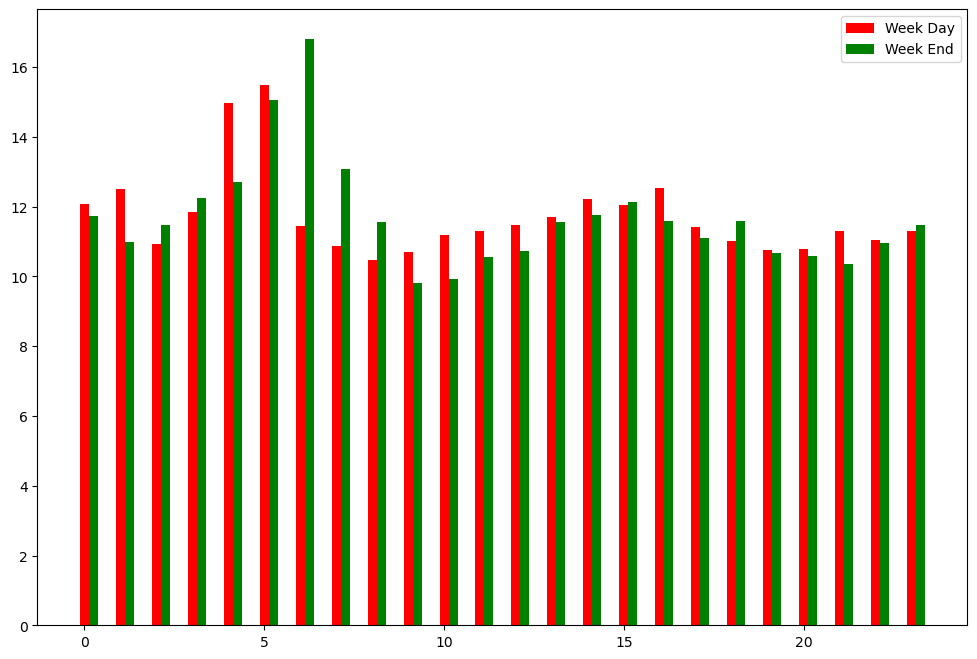

In [45]:
# set width of bar
barwidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(x))
br2 = [x + barwidth for x in br1]
br3 = [x + barwidth for x in br2]
 
plt.bar(br1, y, color='r', width = barwidth, label='Week Day')
plt.bar(br2, z, color='g', width = barwidth, label='Week End')
plt.legend()
plt.show()


In [46]:
df_new.dayofweek.value_counts().sort_index()

0    6637
1    6926
2    7212
3    7404
4    7666
5    7629
6    6516
Name: dayofweek, dtype: int64

In [47]:
df_new['businessday'] = np.nan
df_new.loc[(df_new.dayofweek >= 0) & (df_new.dayofweek <= 4), 'businessday'] = 'Y'
df_new.loc[(df_new.dayofweek >= 5) & (df_new.dayofweek <= 6), 'businessday'] = 'N'

In [48]:
df_new.head()

,amount,no_of_passenger,distance,hour,day,month,dayofweek,businessday
0,4.5,1,0.41,17,15,6,0,Y
1,16.9,1,4.63,16,5,1,1,Y
2,5.7,2,1.00,0,18,8,3,Y
3,7.7,1,0.91,4,21,4,5,N
4,5.3,1,1.36,7,9,3,1,Y


In [49]:
## Creating a new column 'daytime' to update 
df_new.loc[:,'daytime'] = np.nan

In [50]:
df_new.loc[(df_new.hour > 5) & (df_new.hour < 20), 'daytime'] = 'DT'
df_new.daytime.fillna('NT', inplace=True)

In [51]:
df_new.head()

,amount,no_of_passenger,distance,hour,day,month,dayofweek,businessday,daytime
0,4.5,1,0.41,17,15,6,0,Y,DT
1,16.9,1,4.63,16,5,1,1,Y,DT
2,5.7,2,1.00,0,18,8,3,Y,NT
3,7.7,1,0.91,4,21,4,5,N,NT
4,5.3,1,1.36,7,9,3,1,Y,DT


In [52]:
df_new.groupby('daytime')['amount'].mean().round(2)

daytime
DT    11.31
NT    11.48
Name: amount, dtype: float64

In [53]:
df_new.groupby('businessday')['amount'].mean().round(2)

businessday
N    11.32
Y    11.39
Name: amount, dtype: float64

In [54]:
df_new = pd.get_dummies(df_new, drop_first = True)

In [55]:
df_new.head()

,amount,no_of_passenger,distance,hour,day,month,dayofweek,businessday_Y,daytime_NT
0,4.5,1,0.41,17,15,6,0,1,0
1,16.9,1,4.63,16,5,1,1,1,0
2,5.7,2,1.00,0,18,8,3,1,1
3,7.7,1,0.91,4,21,4,5,0,1
4,5.3,1,1.36,7,9,3,1,1,0


In [56]:
X = df_new.drop('amount', axis=1)
y = df_new['amount']

In [57]:
X.shape, y.shape

((49990, 8), (49990,))

In [58]:
rf_model = RandomForestRegressor()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)
rf_model.fit(X_train, y_train)
rf_tr_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

In [60]:
## Evaluating the model
print('RF Model R2_score : ', r2_score(y_test, rf_test_pred))
print('RF Model RMSE : ', np.sqrt(mean_squared_error(y_test, rf_test_pred)))

RF Model R2_score :  0.6671799783718846
RF Model RMSE :  5.352830642698548


In [61]:
df_fea_imp = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), columns=['cols','imp'])
df_fea_imp.sort_values('imp', ascending=False)

,cols,imp
1,distance,0.729838
3,day,0.078427
2,hour,0.065580
4,month,0.054176
5,dayofweek,0.038642
0,no_of_passenger,0.020550
7,daytime_NT,0.006881
6,businessday_Y,0.005904


In [62]:
df_new.loc[:, 'peak'] = np.nan

In [63]:
df_new.loc[df_new.hour.isin([0,1,4,5,14,15,16]),'peak'] = 1

In [106]:
df_new.peak.fillna(0,inplace=True)

In [64]:
df_new.head()

,amount,no_of_passenger,distance,hour,day,month,dayofweek,businessday_Y,daytime_NT,peak
0,4.5,1,0.41,17,15,6,0,1,0,NaN
1,16.9,1,4.63,16,5,1,1,1,0,1.0
2,5.7,2,1.00,0,18,8,3,1,1,1.0
3,7.7,1,0.91,4,21,4,5,0,1,1.0
4,5.3,1,1.36,7,9,3,1,1,0,NaN


In [65]:
miss_values = df_new.isnull().sum()
miss_values[miss_values > 0]

peak    38630
dtype: int64

In [66]:
df.columns, df.shape

(Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
        'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
        'no_of_passenger', 'distance', 'hour', 'day', 'month', 'year',
        'dayofweek'],
       dtype='object'),
 (49999, 14))

In [67]:
df_new1 = pd.concat([df_new, df.iloc[:,[3,4,5,6]]], axis=1)

In [68]:
df_new1 = df_new1.dropna()

In [69]:
miss_values = df_new1.isnull().sum()
miss_values[miss_values > 0]

Series([], dtype: int64)

In [70]:
X = df_new1.drop('amount', axis=1)
y = df_new1['amount']

In [71]:
rf_model = RandomForestRegressor(n_estimators=100)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1234)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
rf_tr_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

In [74]:
## Evaluating the model
print('RF Model Train R2_score : ', round(r2_score(y_train, rf_tr_pred)*100,2),'%')
print('RF Model Train RMSE : ', np.sqrt(mean_squared_error(y_train, rf_tr_pred)))

RF Model Train R2_score :  97.03 %
RF Model Train RMSE :  1.8733238735223912


In [75]:
## Evaluating the model
print('RF Model R2_score : ', r2_score(y_test, rf_test_pred))
print('RF Model RMSE : ', np.sqrt(mean_squared_error(y_test, rf_test_pred)))

RF Model R2_score :  0.7355526593133881
RF Model RMSE :  5.149810077558276


In [76]:
df_fea_imp = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), columns=['cols','imp'])
df_fea_imp.sort_values('imp', ascending=False)

,cols,imp
1,distance,0.734470
12,latitude_of_dropoff,0.066089
10,latitude_of_pickup,0.046647
11,longitude_of_dropoff,0.043763
9,longitude_of_pickup,0.029344
3,day,0.024041
4,month,0.016931
2,hour,0.015612
5,dayofweek,0.011668
0,no_of_passenger,0.005085


In [77]:
lr_model = DecisionTreeRegressor()

In [78]:
lr_model.fit(X_train, y_train)
lr_tr_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)
## Evaluating the model
print('LR Model R2_score : ', r2_score(y_test, lr_test_pred))
print('LR Model RMSE : ', np.sqrt(mean_squared_error(y_test, lr_test_pred)))

LR Model R2_score :  0.5992746441833043
LR Model RMSE :  6.339354265222918


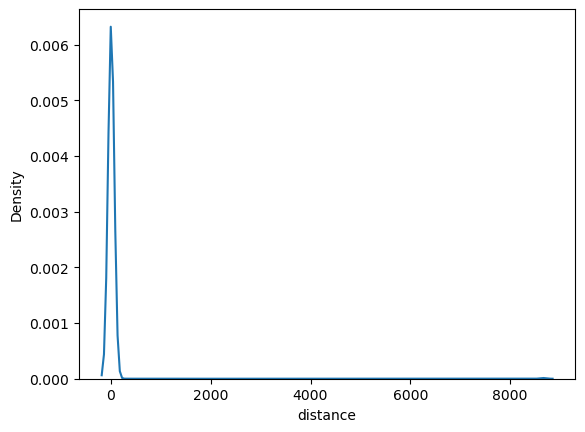

In [79]:
sns.kdeplot('distance', data=df_new1)
plt.show()

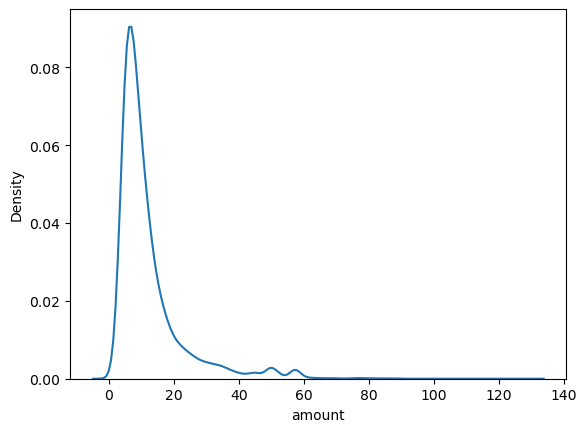

In [80]:
sns.kdeplot('amount', data=df_new1)
plt.show()

In [81]:
df_new1.amount.min(), df_new1.amount.max()

(0.01, 128.83)

In [82]:
df_new1[df_new1.amount <= 0].count()

amount                  0
no_of_passenger         0
distance                0
hour                    0
day                     0
month                   0
dayofweek               0
businessday_Y           0
daytime_NT              0
peak                    0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
dtype: int64

In [83]:
df_new1[df_new1.amount > 50].count()

amount                  207
no_of_passenger         207
distance                207
hour                    207
day                     207
month                   207
dayofweek               207
businessday_Y           207
daytime_NT              207
peak                    207
longitude_of_pickup     207
latitude_of_pickup      207
longitude_of_dropoff    207
latitude_of_dropoff     207
dtype: int64

In [84]:
df_new2 = df_new1[(df_new1.amount > 1) & (df_new1.amount <= 20)]

In [85]:
df_new2.loc[:, 'logamount'] = np.log(df_new2.loc[:, 'amount'])

C:\Users\VIKESH\AppData\Local\Temp\ipykernel_8168\3106954397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.loc[:, 'logamount'] = np.log(df_new2.loc[:, 'amount'])


In [86]:
df_new2.amount.describe()

count    9846.000000
mean        8.835402
std         3.935750
min         2.500000
25%         5.700000
50%         8.000000
75%        11.300000
max        20.000000
Name: amount, dtype: float64

In [87]:
df_new2.loc[df_new2.amount < 1, 'amount'].count()

0

In [88]:
df_new2.columns

Index(['amount', 'no_of_passenger', 'distance', 'hour', 'day', 'month',
       'dayofweek', 'businessday_Y', 'daytime_NT', 'peak',
       'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff',
       'latitude_of_dropoff', 'logamount'],
      dtype='object')

In [89]:
df_new2.shape

(9846, 15)

In [90]:
X = df_new2.drop(['amount','logamount'], axis=1)
y = df_new2.loc[:, ['logamount','amount']]

print(X.shape, y.shape)

(9846, 13) (9846, 2)


In [91]:
rf_model1 = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1234)
rf_model1.fit(X_train, y_train['logamount'])

rf_tr_pred1 = rf_model1.predict(X_train)
rf_test_pred1 = rf_model1.predict(X_test)

## Evaluating the model
print('RF Model Train R2_score : ', r2_score(y_train['amount'], np.exp(rf_tr_pred1)))
print('RF Model Train RMSE : ', np.sqrt(mean_squared_error(y_train['amount'], np.exp(rf_tr_pred1))))

## Evaluating the model
print('RF Model Test R2_score : ', r2_score(y_test['amount'], np.exp(rf_test_pred1)))
print('RF Model Test RMSE : ', np.sqrt(mean_squared_error(y_test['amount'], np.exp(rf_test_pred1))))

RF Model Train R2_score :  0.9381360204174857
RF Model Train RMSE :  0.9821663097067166
RF Model Test R2_score :  0.6351054077913036
RF Model Test RMSE :  2.357790724782646


### GridSearchCV

In [92]:
tuned_parameters = {'n_estimators': [ 85, 100], 
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10] }

In [93]:
tuned_parameters

{'n_estimators': [85, 100],
 'min_samples_split': [15, 20],
 'max_depth': [8, 10]}

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
gs_model = GridSearchCV(estimator=rf_model1, param_grid = tuned_parameters, cv=5)

In [96]:
gs_model.fit(X_train, y_train['logamount'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [97]:
# get the best parameters
print('Best parameters for random forest regressor: ', gs_model.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 85} 



In [98]:
print("Best Score: ", gs_model.best_score_)

Best Score:  0.5991872823381537


In [99]:
rf_model = RandomForestRegressor(n_estimators=85, max_depth=10, min_samples_split=15)

In [92]:
rf_model.fit(X_train, y_train['logamount'])

rf_tr_pred1 = rf_model.predict(X_train)
rf_test_pred1 = rf_model.predict(X_test)

## Evaluating the model
print('RF Model Train R2_score : ', r2_score(y_train['amount'], np.exp(rf_tr_pred1)))
print('RF Model Train RMSE : ', np.sqrt(mean_squared_error(y_train['amount'], np.exp(rf_tr_pred1))))

## Evaluating the model
print('RF Model Test R2_score : ', r2_score(y_test['amount'], np.exp(rf_test_pred1)))
print('RF Model Test RMSE : ', np.sqrt(mean_squared_error(y_test['amount'], np.exp(rf_test_pred1))))

RF Model Train R2_score :  0.6855887888038226
RF Model Train RMSE :  2.146667275576808
RF Model Test R2_score :  0.6131733310909602
RF Model Test RMSE :  2.3908834809817883


In [93]:
df_fea_imp = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), columns=['cols','imp'])
df_fea_imp.sort_values('imp', ascending=False)

,cols,imp
1,distance,0.697874
13,latitude_of_dropoff,0.090907
11,latitude_of_pickup,0.084213
5,year,0.042211
12,longitude_of_dropoff,0.029845
10,longitude_of_pickup,0.018918
2,hour,0.011848
3,day,0.007270
4,month,0.007252
6,dayofweek,0.003822


In [94]:
df_new1.amount.min(), df_new1.amount.max()

(-5.0, 200.0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


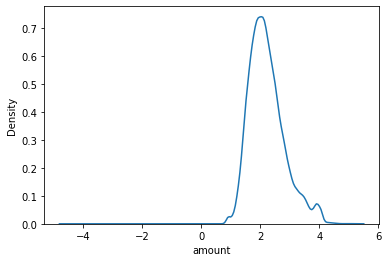

In [95]:
sns.kdeplot(x=np.log(df_new1.amount), data=df_new1)
plt.show()

### BaggingRegressor with Repeated CV

In [96]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.ensemble import BaggingRegressor

In [97]:
## Initializing the model
model = BaggingRegressor()

In [98]:
## Setting the cross-validation parameters
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state=1)

In [112]:
## Building the cross-validation
nscores = cross_val_score(model, X_train, y_train['amount'], scoring='neg_mean_squared_error', cv = cv)

In [113]:
nscores

array([-4.04014053, -3.79984531, -4.12559783, -4.13317144, -4.14519028,
       -3.79232213, -3.85922465, -3.83759693, -3.94300329, -4.14560714,
       -3.93104928, -4.24239842, -4.29399635, -4.02082961, -3.76698011,
       -4.13202725, -4.15427971, -3.89683529, -4.11725737, -4.00569625,
       -3.46190164, -3.7260725 , -4.21707105, -3.79347921, -4.11618287,
       -3.7631128 , -4.0796998 , -3.81101855, -3.71675567, -4.8264246 ])

In [114]:
np.sqrt(np.mean(nscores)*-1)  ## This is training RMSE

1.999122873158531

In [101]:
#model.fit(X_train, y_train['amount'])

BaggingRegressor()

In [116]:
bag_pred = model.predict(X_test)

In [117]:
r2_score(y_test['amount'], bag_pred)

0.7342859374764015

In [118]:
np.sqrt(mean_squared_error(y_test['amount'], bag_pred))  ## This is test RMSE

1.9815611416606265

### Using xgboost.XGBRegressor

In [119]:
from xgboost import XGBRegressor

In [120]:
model = XGBRegressor()

In [121]:
model.fit(X_train, y_train['amount'], \
        verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [122]:
xgb_predict = model.predict(X_test)

In [123]:
print("Test R2 Score:",r2_score(y_test['amount'], xgb_predict))

Test R2 Score: 0.7342859374764015


In [124]:
print("Test RMSE : ", np.sqrt(mean_squared_error(y_test['amount'], xgb_predict)))

Test RMSE :  1.9815611416606265
